In [1]:
#!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113 matplotlib

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchsummary, torchaudio
import torchaudio.transforms as T
from matplotlib import pyplot as plt
import os, csv
from IPython.display import Audio, display
from itertools import groupby
import numpy as np

In [3]:
#Data Folder. The original dataset is taken from Kaggle: https://www.kaggle.com/datasets/kenjee/z-by-hp-unlocked-challenge-3-signal-processing?resource=download
ROOT = "data"
capuchin_data = os.path.join(ROOT, "Parsed_Capuchinbird_Clips")
other_data = os.path.join(ROOT, "Parsed_Not_Capuchinbird_Clips")
forest_data = os.path.join(ROOT, "Forest_Recordings")

DOWNSAMPLE_RATE = 16000

In [4]:
def downsample_audio(filename, downsampling_rate):

  waveform, sample_rate = torchaudio.load(filename)
  resampler = T.Resample(sample_rate, downsampling_rate, dtype=waveform.dtype)
  resampled_waveform = resampler(waveform)
  return resampled_waveform


In [5]:
def play_audio(waveform, sample_rate):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  if num_channels == 1:
    display(Audio(waveform[0], rate=sample_rate))
  elif num_channels == 2:
    display(Audio((waveform[0], waveform[1]), rate=sample_rate))
  else:
    raise ValueError("Waveform with more than 2 channels are not supported.")

In [6]:
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
        if ylim:
            axes[c].set_ylim(ylim)
    figure.suptitle(title)
    plt.show(block=False)

In [7]:
EXAMPLE_FILE_CAPUCHIN = os.path.join(capuchin_data, "XC16803-1.wav")
EXAMPLE_FILE_NOT_CAPUCHIN = os.path.join(other_data, "birds-singing-in-forest-sounds-24.wav")

In [8]:
metadata = torchaudio.info(EXAMPLE_FILE_CAPUCHIN)
print(metadata)

AudioMetaData(sample_rate=44100, num_frames=110250, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [9]:
metadata.sample_rate

44100

#Playing some data

**How Capuchin Bird sounds like**

In [10]:
waveform, sample_rate = torchaudio.load(EXAMPLE_FILE_CAPUCHIN)
play_audio(waveform, sample_rate)

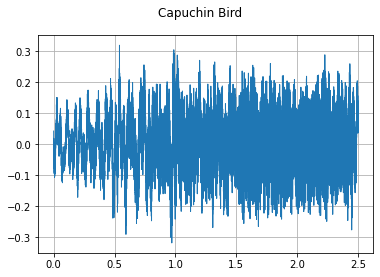

In [11]:
plot_waveform(waveform,sample_rate, title="Capuchin Bird")

**Other Sounds**

In [12]:
waveform, sample_rate = torchaudio.load(EXAMPLE_FILE_NOT_CAPUCHIN)
play_audio(waveform, sample_rate)

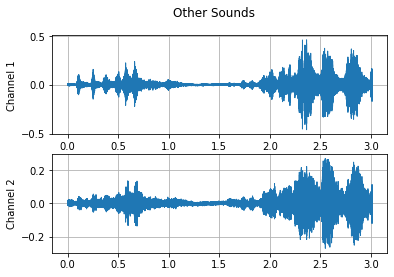

In [13]:
plot_waveform(waveform,sample_rate, title="Other Sounds")

In [14]:
lengths = []

for file in os.listdir(capuchin_data):
  downsampled_audio = downsample_audio(os.path.join(capuchin_data, file), DOWNSAMPLE_RATE)
  lengths.append(len(downsampled_audio[0]))


In [15]:
print(f"Longest call of the capuchin bird is {max(lengths)/DOWNSAMPLE_RATE} seconds")
print(f"Shortest call of the capuchin bird is {min(lengths)/DOWNSAMPLE_RATE} seconds")
print(f"Average call of the capuchin bird is {round(sum(lengths)/len(lengths))/DOWNSAMPLE_RATE} seconds")

Longest call of the capuchin bird is 5.0 seconds
Shortest call of the capuchin bird is 2.0 seconds
Average call of the capuchin bird is 3.3848125 seconds


In [16]:
selected_length = int(round(sum(lengths)/len(lengths),-3))
selected_length

54000

In [17]:
total_count_capuchin = [1 for file in os.listdir(capuchin_data)]
total_count_not_capuchin = [1 for file in os.listdir(other_data)]
len(total_count_capuchin)


217

In [18]:
len(total_count_not_capuchin)

593

In [19]:
pos_labels = torch.ones(len(total_count_capuchin))
pos_labels

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.])

In [20]:
neg_labels = torch.zeros(len(total_count_not_capuchin))

In [21]:
list_files_capuchin = []
for root, dirs, files in os.walk(capuchin_data):
  for file in files:
    list_files_capuchin.append(os.path.join(root, file))

capuchin_dataset = zip(list_files_capuchin, pos_labels)
list(capuchin_dataset)

[('data\\Parsed_Capuchinbird_Clips\\XC114131-0.wav', tensor(1.)),
 ('data\\Parsed_Capuchinbird_Clips\\XC114131-1.wav', tensor(1.)),
 ('data\\Parsed_Capuchinbird_Clips\\XC114131-2.wav', tensor(1.)),
 ('data\\Parsed_Capuchinbird_Clips\\XC114131-3.wav', tensor(1.)),
 ('data\\Parsed_Capuchinbird_Clips\\XC114131-4.wav', tensor(1.)),
 ('data\\Parsed_Capuchinbird_Clips\\XC114132-0.wav', tensor(1.)),
 ('data\\Parsed_Capuchinbird_Clips\\XC114132-1.wav', tensor(1.)),
 ('data\\Parsed_Capuchinbird_Clips\\XC114132-2.wav', tensor(1.)),
 ('data\\Parsed_Capuchinbird_Clips\\XC114132-3.wav', tensor(1.)),
 ('data\\Parsed_Capuchinbird_Clips\\XC114132-4.wav', tensor(1.)),
 ('data\\Parsed_Capuchinbird_Clips\\XC114132-5.wav', tensor(1.)),
 ('data\\Parsed_Capuchinbird_Clips\\XC114132-6.wav', tensor(1.)),
 ('data\\Parsed_Capuchinbird_Clips\\XC119294-0.wav', tensor(1.)),
 ('data\\Parsed_Capuchinbird_Clips\\XC16803-0.wav', tensor(1.)),
 ('data\\Parsed_Capuchinbird_Clips\\XC16803-1.wav', tensor(1.)),
 ('data\\Par

In [22]:
list_files_not_capuchin = []
for root, dirs, files in os.walk(other_data):
  for file in files:
    list_files_not_capuchin.append(os.path.join(root, file))

not_capuchin_dataset = zip(list_files_not_capuchin, neg_labels)
list(not_capuchin_dataset)

[('data\\Parsed_Not_Capuchinbird_Clips\\afternoon-birds-song-in-forest-0.wav',
  tensor(0.)),
 ('data\\Parsed_Not_Capuchinbird_Clips\\afternoon-birds-song-in-forest-1.wav',
  tensor(0.)),
 ('data\\Parsed_Not_Capuchinbird_Clips\\afternoon-birds-song-in-forest-10.wav',
  tensor(0.)),
 ('data\\Parsed_Not_Capuchinbird_Clips\\afternoon-birds-song-in-forest-11.wav',
  tensor(0.)),
 ('data\\Parsed_Not_Capuchinbird_Clips\\afternoon-birds-song-in-forest-12.wav',
  tensor(0.)),
 ('data\\Parsed_Not_Capuchinbird_Clips\\afternoon-birds-song-in-forest-13.wav',
  tensor(0.)),
 ('data\\Parsed_Not_Capuchinbird_Clips\\afternoon-birds-song-in-forest-14.wav',
  tensor(0.)),
 ('data\\Parsed_Not_Capuchinbird_Clips\\afternoon-birds-song-in-forest-15.wav',
  tensor(0.)),
 ('data\\Parsed_Not_Capuchinbird_Clips\\afternoon-birds-song-in-forest-16.wav',
  tensor(0.)),
 ('data\\Parsed_Not_Capuchinbird_Clips\\afternoon-birds-song-in-forest-17.wav',
  tensor(0.)),
 ('data\\Parsed_Not_Capuchinbird_Clips\\afternoon-bi

In [23]:
full_data = list_files_capuchin + list_files_not_capuchin
len(full_data)

810

In [24]:
def preprocess_data(file_path, label):
  file_audio = downsample_audio(file_path, DOWNSAMPLE_RATE)
  file_audio = file_audio[:selected_length]
  zero_padding = torch.zeros(selected_length - file_audio[0].size()[0], dtype=torch.float32)
  zero_padding = zero_padding[None, :]
  file_audio = torch.concat((zero_padding, file_audio),1)
  spectrogram = torch.abs(torch.stft(file_audio, 320, hop_length=32))
  spectrogram.unsqueeze(0)
  return spectrogram, label

In [25]:
file_audio = downsample_audio(EXAMPLE_FILE_CAPUCHIN, DOWNSAMPLE_RATE)
file_audio.shape

torch.Size([1, 40000])

In [26]:
file_audio = file_audio[:selected_length]
file_audio.shape

torch.Size([1, 40000])

In [27]:
zero_padding = torch.zeros(selected_length - file_audio[0].size()[0], dtype=torch.float32)
zero_padding.shape

torch.Size([14000])

In [28]:
zero_padding = zero_padding[None, :]
zero_padding.shape

torch.Size([1, 14000])

In [29]:
file_audio = torch.concat((zero_padding, file_audio),1)
file_audio.shape

torch.Size([1, 54000])

In [30]:
spectrogram = torch.abs(torch.stft(file_audio, 320, hop_length=32))
spectrogram.shape

c:\Users\ultra\AppData\Local\Programs\Python\Python37\lib\site-packages\torch\functional.py:573: UserWarning: stft will soon require the return_complex parameter be given for real inputs, and will further require that return_complex=True in a future PyTorch release. (Triggered internally at  ..\aten\src\ATen\native\SpectralOps.cpp:659.)
  normalized, onesided, return_complex)


torch.Size([1, 161, 1688, 2])

In [31]:
spectrogram.unsqueeze(0)


tensor([[[[[0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00],
           ...,
           [3.0843e+01, 0.0000e+00],
           [3.4718e+01, 0.0000e+00],
           [3.7209e+01, 0.0000e+00]],

          [[0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00],
           ...,
           [5.2303e+00, 1.8511e+00],
           [1.7082e+00, 3.2410e-01],
           [1.0995e+00, 3.9297e-01]],

          [[0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00],
           ...,
           [5.7017e-01, 4.5558e+00],
           [1.2771e+00, 4.2186e+00],
           [2.6665e+00, 1.6483e+00]],

          ...,

          [[0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00],
           ...,
           [1.2866e-01, 1.6523e-02],
           [7.0999e-02, 6.0374e-02],
           [6.7415e-03, 2.9912e-02]],

          [[0.0000e+00, 

In [32]:
y_spectrogram = spectrogram.squeeze(0)
y_spectrogram.shape

torch.Size([161, 1688, 2])

In [33]:
y_spectrogram.view([161,1688,2])
y_spectrogram.shape

torch.Size([161, 1688, 2])

In [34]:
final = torch.sum(y_spectrogram[0], dim=1)

In [35]:
final.shape

torch.Size([1688])

In [36]:
final

tensor([ 0.0000,  0.0000,  0.0000,  ..., 30.8429, 34.7185, 37.2095])

In [37]:
plt.figure(figsize=(20,5))
plt.imshow(torch.transpose(final))
plt.show()

TypeError: transpose() received an invalid combination of arguments - got (Tensor), but expected one of:
 * (Tensor input, int dim0, int dim1)
 * (Tensor input, name dim0, name dim1)


<Figure size 1440x360 with 0 Axes>

TypeError: Invalid shape (1688,) for image data

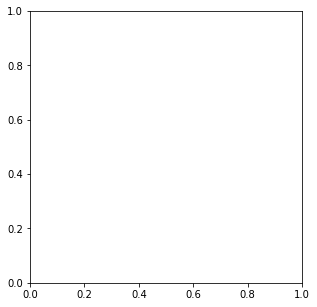

In [ ]:
spectrogram , label = preprocess_data(EXAMPLE_FILE_CAPUCHIN, 1)
plt.figure(figsize=(20,5))
plt.imshow(final)
plt.show()

In [ ]:
file_audio = downsample_audio(EXAMPLE_FILE_CAPUCHIN, DOWNSAMPLE_RATE)
file_audio = file_audio[:selected_length]
zero_padding = torch.zeros(selected_length - file_audio[0].size()[0], dtype=torch.float32)
zero_padding = zero_padding[None, :]
zero_padding.shape

torch.Size([1, 14000])